# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import plotly.express as px
import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelEncoder


# Importing Data

In [3]:
try:
    if("F:\\1_Study_Materials\\kaggel\\Fyenn Labs\\cell_phone.csv"):
        df=pd.read_csv("F:\\1_Study_Materials\\kaggel\\Fyenn Labs\\cell_phone.csv")
except:
    print("Data not present")

In [4]:
df.iloc[:5,13:]

charging_speed  screen_size  screen_refrash_rate  screen_resoultion  \
0             100         6.70                  120             1440.0   
1              33         6.59                  120             1080.0   
2              15         6.60                   90             1080.0   
3              10         6.55                  120             1080.0   
4              67         6.70                  120             1080.0   

   rear_cam  front_cam  memory_card  hybrid_card  os_type  
0      16.0       16.0            0            0  android  
1      16.0       16.0            1            1  android  
2      13.0       13.0            1            0  android  
3      16.0       16.0            1            1  android  
4      16.0       16.0            0            0  android

# Exploratory Data Aanalysis

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864 entries, 0 to 863
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   rating               864 non-null    float64
 1   brand                864 non-null    object 
 2   price_clean          864 non-null    int64  
 3   no_of_sim            864 non-null    int64  
 4   5g                   864 non-null    int64  
 5   nfc                  864 non-null    int64  
 6   irb                  864 non-null    int64  
 7   processor_name       864 non-null    object 
 8   core                 864 non-null    float64
 9   clock_speed          864 non-null    float64
 10  ram_size             864 non-null    float64
 11  rom_size             864 non-null    float64
 12  mah                  864 non-null    int64  
 13  charging_speed       864 non-null    int64  
 14  screen_size          864 non-null    float64
 15  screen_refrash_rate  864 non-null    int

In [6]:
df.describe()

rating    price_clean   no_of_sim         5g         nfc  \
count  864.000000     864.000000  864.000000  864.00000  864.000000   
mean    78.204236   26455.608796    1.989583    0.53588    0.362269   
std      7.080465   26270.384245    0.101588    0.49900    0.480934   
min     60.000000    3499.000000    1.000000    0.00000    0.000000   
25%     75.000000   12499.000000    2.000000    0.00000    0.000000   
50%     79.000000   18498.500000    2.000000    1.00000    0.000000   
75%     84.000000   29999.000000    2.000000    1.00000    1.000000   
max     89.000000  480000.000000    2.000000    1.00000    1.000000   

              irb        core  clock_speed    ram_size    rom_size  \
count  864.000000  864.000000   864.000000  864.000000  864.000000   
mean     0.173611    7.807870     2.397674    6.406250  129.898148   
std      0.378994    0.802738     0.449227    2.656985   76.928456   
min      0.000000    4.000000     1.200000    1.000000    8.000000   
25%      0.000000    8.000000     2.050000    4.000000   64.000000   
50%      0.000000    8.000000     2.300000    6.000000  128.000000   
75%      0.000000    8.000000     2.800000    8.000000  128.000000   
max      1.000000    8.000000     3.220000   18.000000  512.000000   

                mah  charging_speed  screen_size  screen_refrash_rate  \
count    864.000000      864.000000   864.000000           864.000000   
mean    4862.394676       38.918981     6.537743            92.052083   
std     1007.175331       34.556088     0.244658            28.458436   
min     1821.000000        2.000000     4.700000            60.000000   
25%     4500.000000       15.000000     6.500000            60.000000   
50%     5000.000000       30.000000     6.580000            90.000000   
75%     5000.000000       65.000000     6.670000           120.000000   
max    22000.000000      240.000000     7.000000           165.000000   

       screen_resoultion    rear_cam   front_cam  memory_card  hybrid_card  
count         864.000000  864.000000  864.000000   864.000000   864.000000  
mean         1045.694444   16.184028   16.184028     0.905093     0.164352  
std           250.646403   10.440126   10.440126     0.293257     0.370809  
min           720.000000    2.000000    2.000000     0.000000     0.000000  
25%          1080.000000    8.000000    8.000000     1.000000     0.000000  
50%          1080.000000   16.000000   16.000000     1.000000     0.000000  
75%          1080.000000   16.000000   16.000000     1.000000     0.000000  
max          2200.000000   60.000000   60.000000     1.000000     1.000000

In [7]:
df.describe(include=['O'])

brand processor_name  os_type
count      864            864      864
unique      43            187        3
top     Xiaomi      Helio P35  android
freq       129             30      646

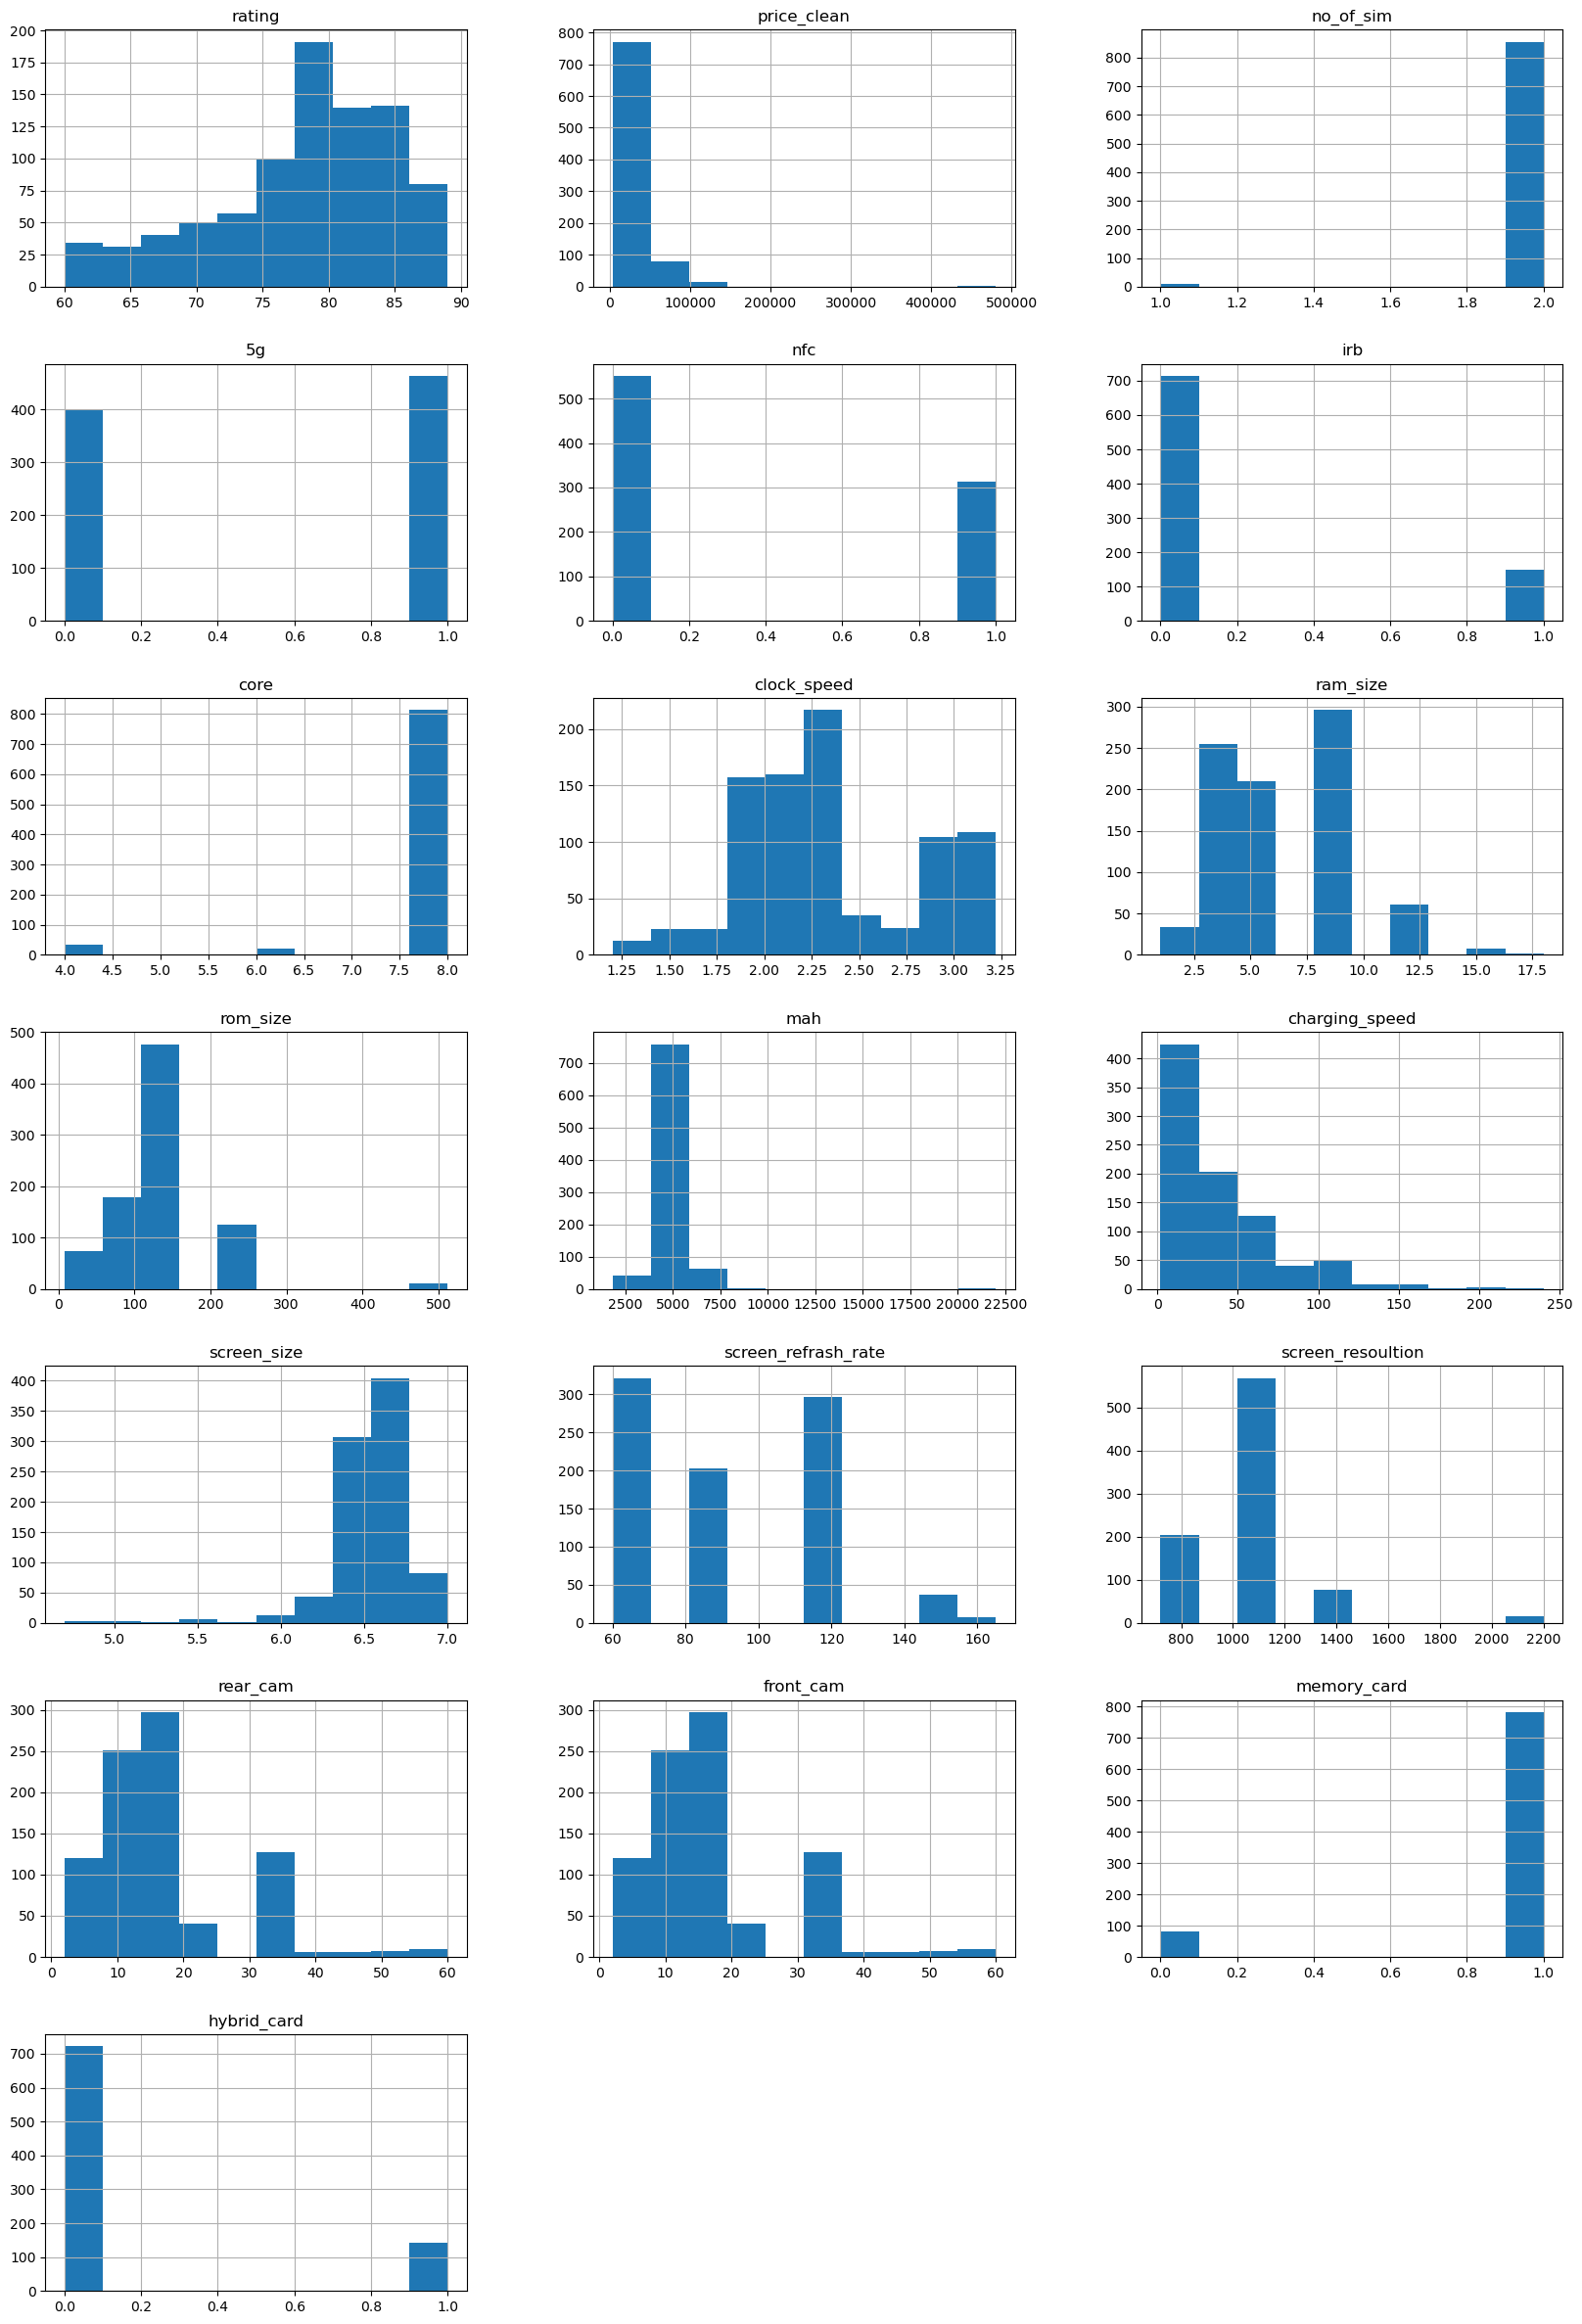

In [8]:
df.hist(layout = (7,3), 
        figsize=(20,30), 
        sharex=False, 
        sharey=False);

In [9]:
# df.plot(kind="kde", 
#         subplots=True, 
#         layout = (7,3), 
#         figsize=(20,30), 
#         sharex=False, 
#         sharey=False);

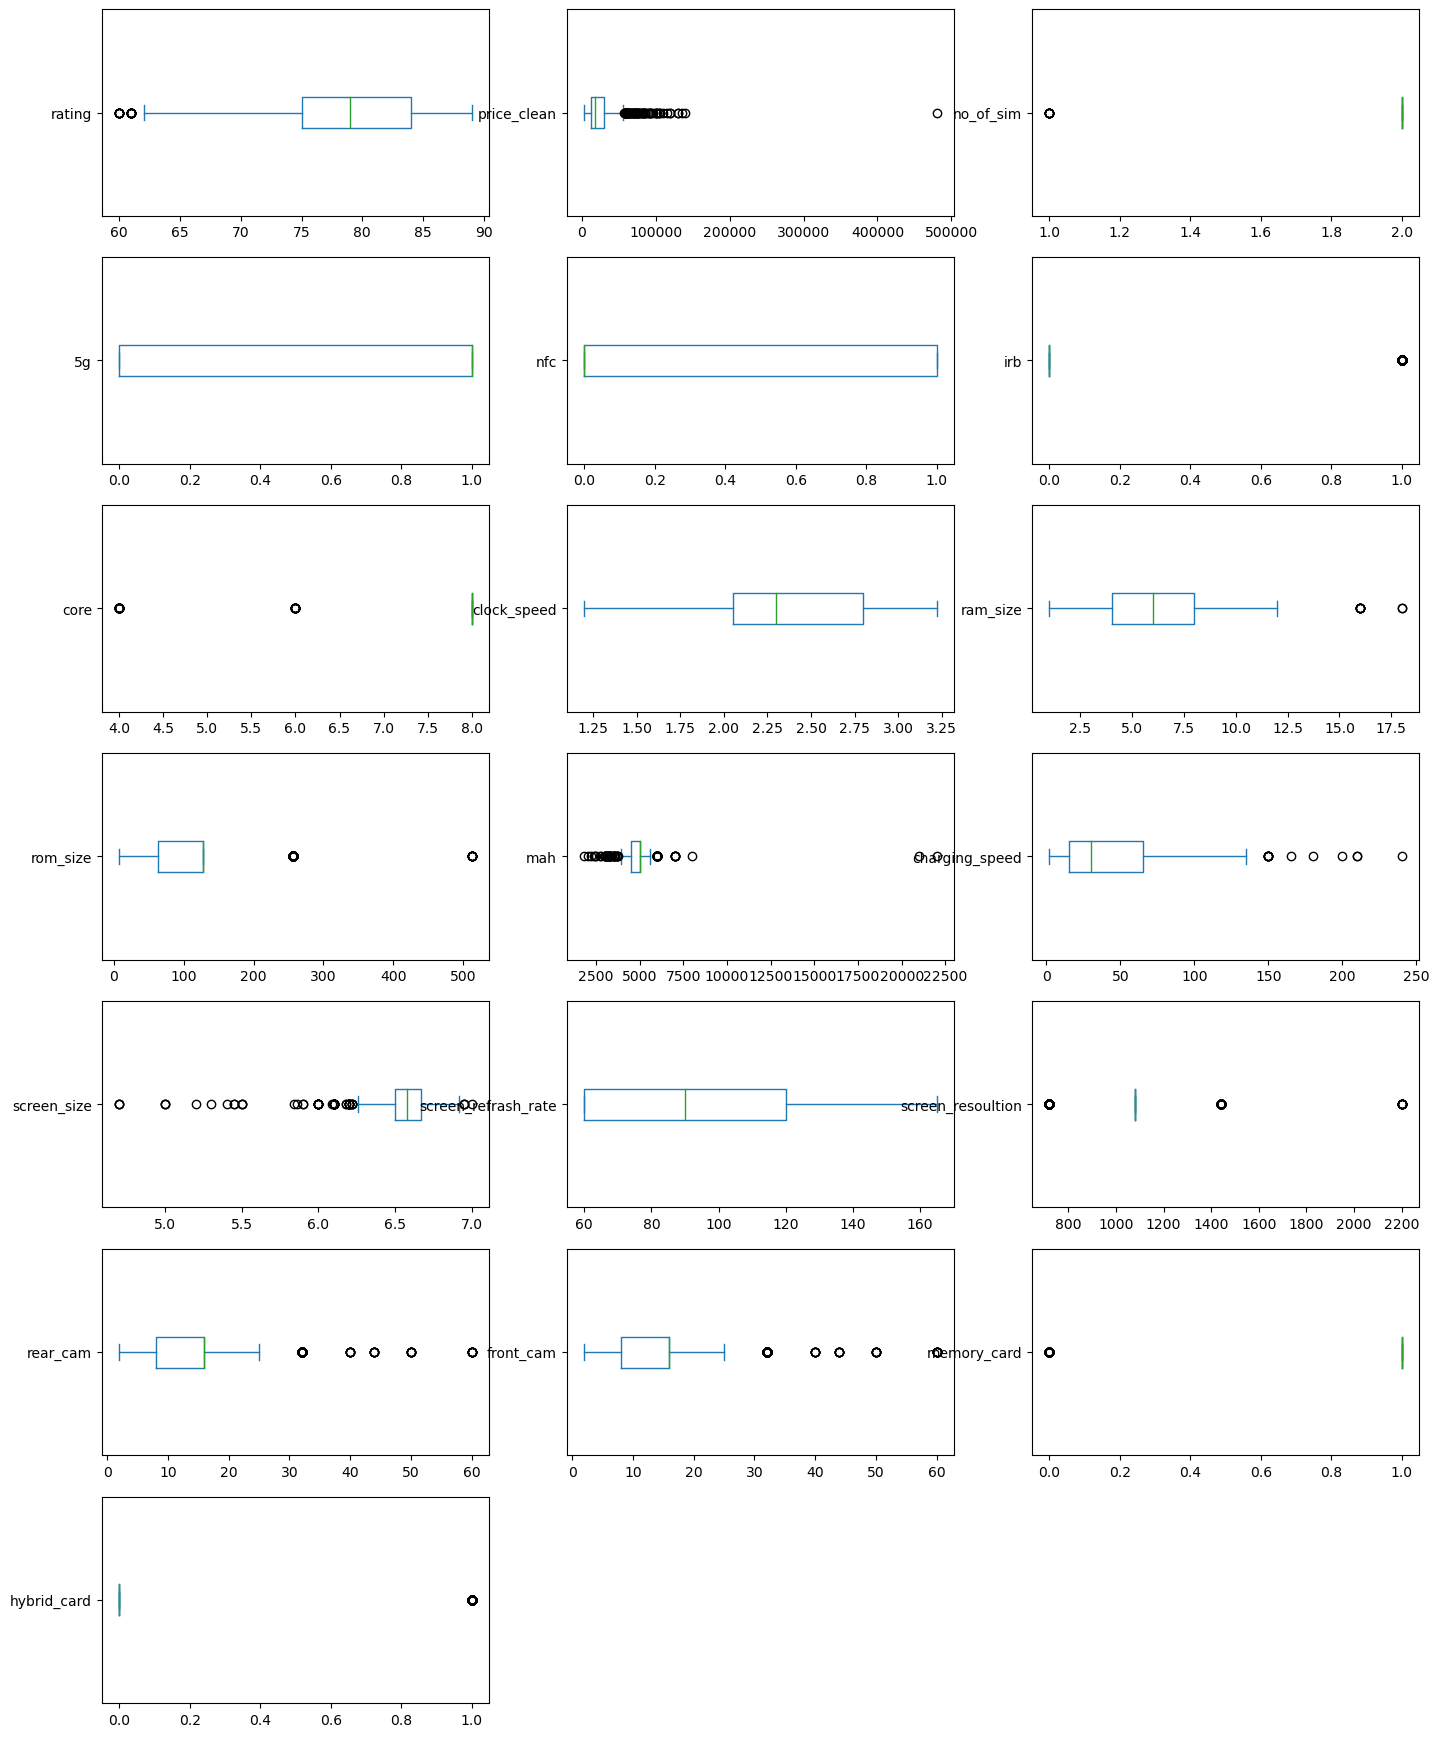

In [10]:
df.plot(kind="box", 
        vert=False, # makes horizontal plots instead of vertical
        subplots=True, 
        layout = (7,3), 
        figsize=(17,22), 
        sharex=False, 
        sharey=False);

<AxesSubplot:xlabel='price_clean', ylabel='brand'>

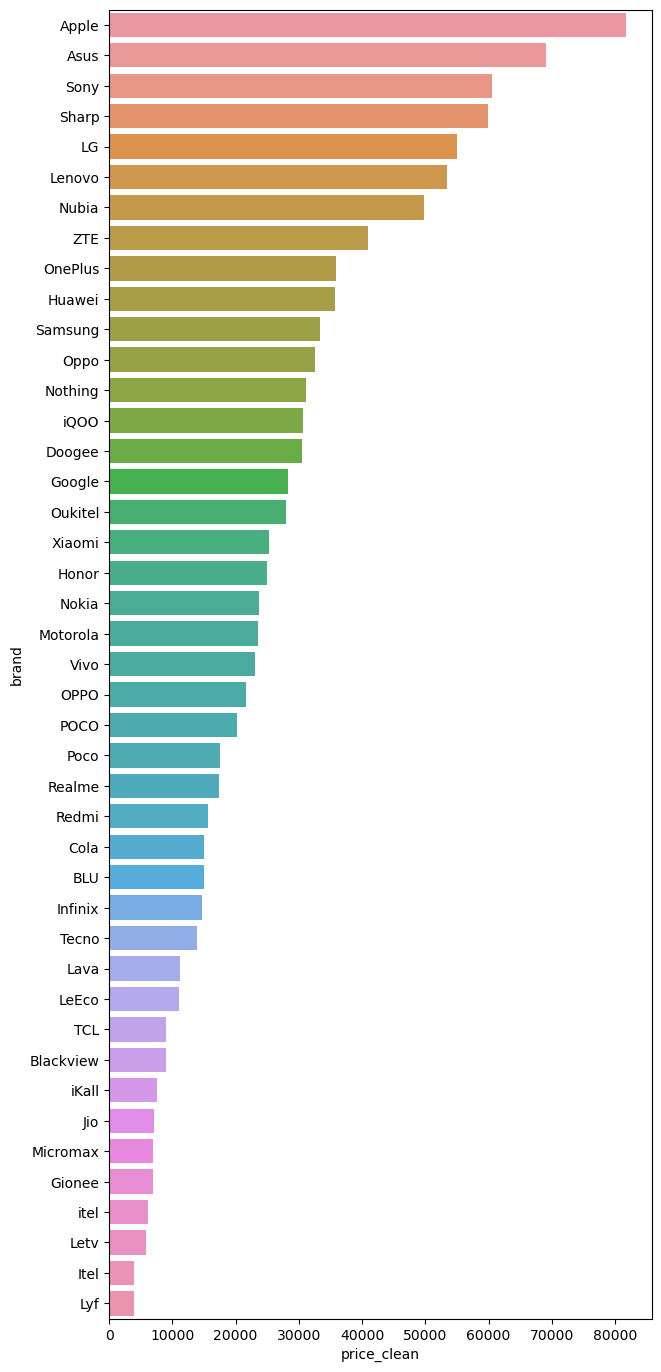

In [11]:
brand_avg=round(df[['price_clean','brand']].groupby('brand').mean().reset_index()\
                .sort_values('price_clean',ascending=False))

plt.figure(figsize=(7,17))
sns.barplot(y='brand',x='price_clean',data=brand_avg)

## Observations
* Companies like Apple, Asus, Sharp, LG, Lenovo and Nubia make really top-notch, high-quality phones. On the other hand, brands like OnePlus, Huawei, Samsung, Oppo, Nothing, iQOO, Google and Xiaomi offer phones that are more in the middle range in terms of quality and features. 

<AxesSubplot:xlabel='ram_size', ylabel='price_clean'>

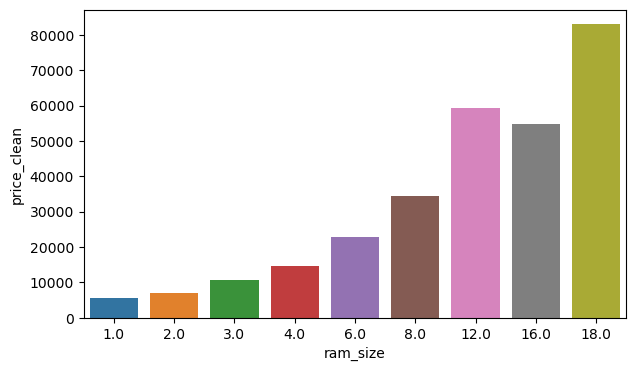

In [12]:
ram_avg=round(df[['price_clean','ram_size']].groupby('ram_size').mean().reset_index()\
                .sort_values('price_clean',ascending=False))

plt.figure(figsize=(7,4))
sns.barplot(x='ram_size',y='price_clean',data=ram_avg)

In [13]:
# df.columns

In [14]:
avg=round(df[['price_clean','ram_size','mah','brand']]\
          .groupby(['ram_size','mah','brand']).mean().reset_index()\
          .sort_values(['ram_size','mah'],ascending=False))
# avg[avg['ram_size']>=4]

fig = px.histogram(avg.dropna(), x="mah", y="price_clean", color="ram_size",
                   marginal="box", # box or violin, rug
                   hover_data=avg.columns)
fig.show()

## Observations
* Most of the phones have 5000 mAh to 5500 mAh battery.
* Whithin 5000 mAh to 5500 mAh battery range most of the phones having 8 GB ram.

In [15]:
avg=round(df[['price_clean','rear_cam','screen_resoultion','brand']]\
          .groupby(['rear_cam','screen_resoultion','brand']).mean().reset_index()\
          .sort_values(['rear_cam','screen_resoultion'],ascending=False))
# avg[avg['ram_size']>=4]

fig = px.histogram(avg.dropna(), x="rear_cam", y="price_clean", color="screen_resoultion",
                   marginal="box", # box or violin, rug
                   hover_data=avg.columns)
fig.show()

## Observations
* There's no proof that having more megapixels in the main camera of a phone always means the screen will be better or sharper.
* Most of the phones have FullHD+(1080 px) or 2k(1440 px) display.

In [16]:
# df.columns

In [17]:
avg=round(df[['price_clean','charging_speed','clock_speed','brand']]\
          .groupby(['charging_speed','clock_speed','brand']).mean().reset_index()\
          .sort_values(['charging_speed','clock_speed'],ascending=False))
# avg[avg['ram_size']>=4]

fig = px.histogram(avg.dropna(), x="charging_speed", y="price_clean", color="clock_speed",
                   marginal="box", # box or violin, rug
                   hover_data=avg.columns)
fig.show()

## Observations
* When the clock speed is higher, it can mean that the charging speed also gets faster.

In [18]:
# avg=round(df[['price_clean','ram_size','mah','screen_resoultion','brand','screen_refrash_rate','rear_cam']]\
#           .groupby(['ram_size','mah','screen_resoultion','screen_refrash_rate','rear_cam','brand']).mean().reset_index()\
#           .sort_values(['ram_size','mah','screen_resoultion','screen_refrash_rate','rear_cam','price_clean'],ascending=False))

# avg[:40]
# plt.figure(figsize=(7,4))
# sns.barplot(x='ram_size',y='price_clean',data=ram_avg)

<AxesSubplot:>

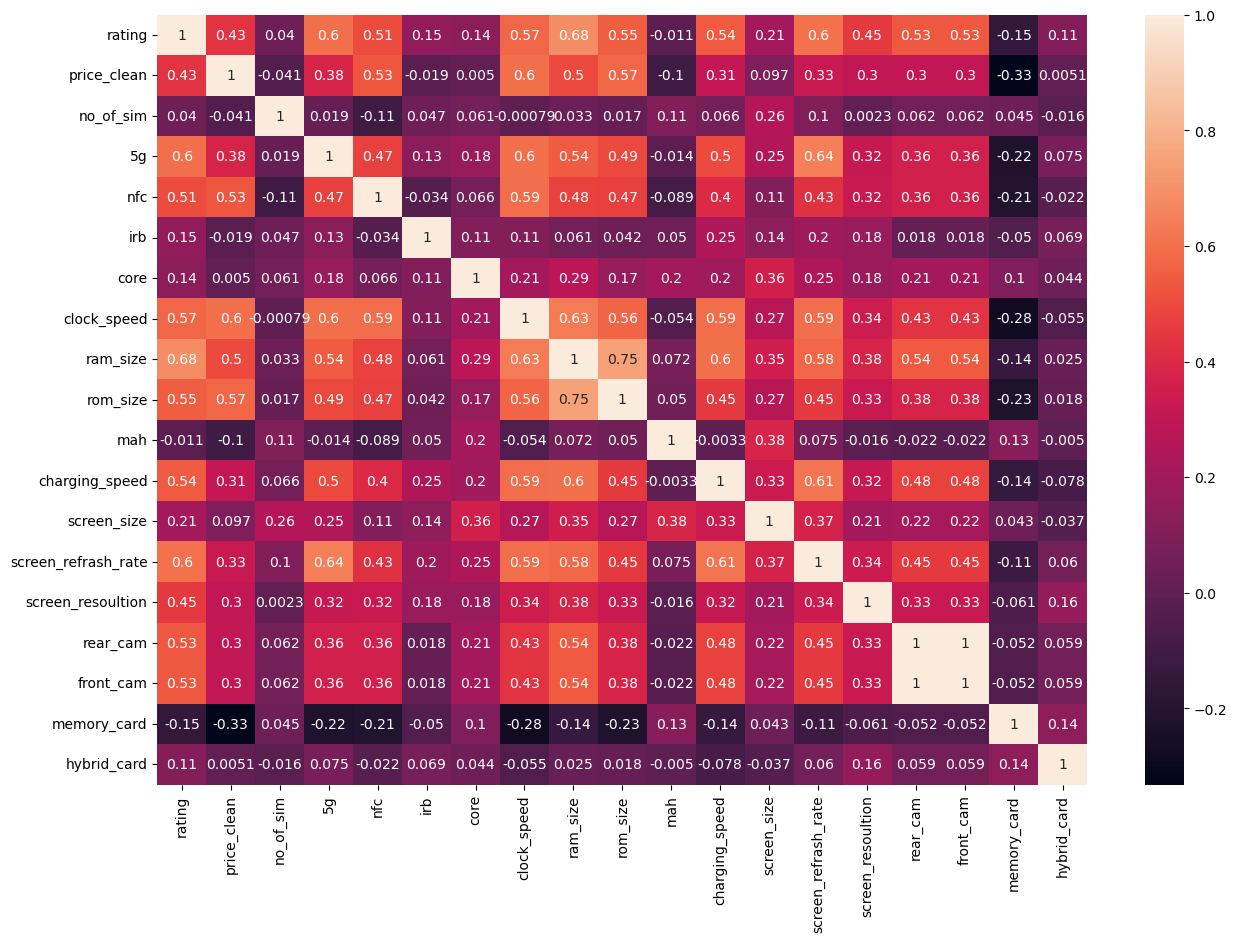

In [19]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True)

# Modeling

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

In [24]:
from sklearn.preprocessing import LabelEncoder

# define the columns to encode using label encoding
columns_to_encode = ['brand', 'processor_name', 'os_type']

# create a dictionary to store the trained label encoders
label_encoders = {}

# create a LabelEncoder object for each column
for col in columns_to_encode:
    encode = LabelEncoder()
    df[col] = encode.fit_transform(df[col].astype(str))
    label_encoders[col] = encode

In [34]:
xTrain,xTest,yTrain,yTest=train_test_split(df.drop('price_clean',axis=1),df['price_clean'],test_size=0.2)

In [35]:
model=RandomForestRegressor()
model.fit(xTrain,yTrain)
pred=model.predict(xTest)
r2_score(yTest,pred)

0.8149424846889588

In [37]:
from sklearn.model_selection import StratifiedKFold
StratifiedKFold()

StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

In [47]:
X=df.drop('price_clean',axis=1)
y=df['price_clean']

In [48]:
# pd.cut(y_log, bins=4)

In [49]:
# y_categorized = y.apply(categorize_target)
y_log = np.log1p(y)

y_categorized= pd.cut(y_log, bins=range(0,16,5), include_lowest=True,right=False, labels=range(0,15,5)) # Thanks to Vitaly Portnoy

In [50]:
from sklearn.model_selection import StratifiedKFold
import lightgbm as lgb
from sklearn.metrics import mean_squared_error
lgb_params1 = {"objective" : "regression", "metric" : "rmse", 
               "max_depth": 8, "min_child_samples": 20, 
               "reg_alpha": 1, "reg_lambda": 1,
               "num_leaves" : 257, "learning_rate" : 0.01, 
               "subsample" : 0.8, "colsample_bytree" : 0.8, 
               "verbosity": -1}

LGB 0--------------------------------------------------
LGB 1--------------------------------------------------
LGB 2--------------------------------------------------
LGB 3--------------------------------------------------
LGB 4--------------------------------------------------
CV_LGB :  0.22477922


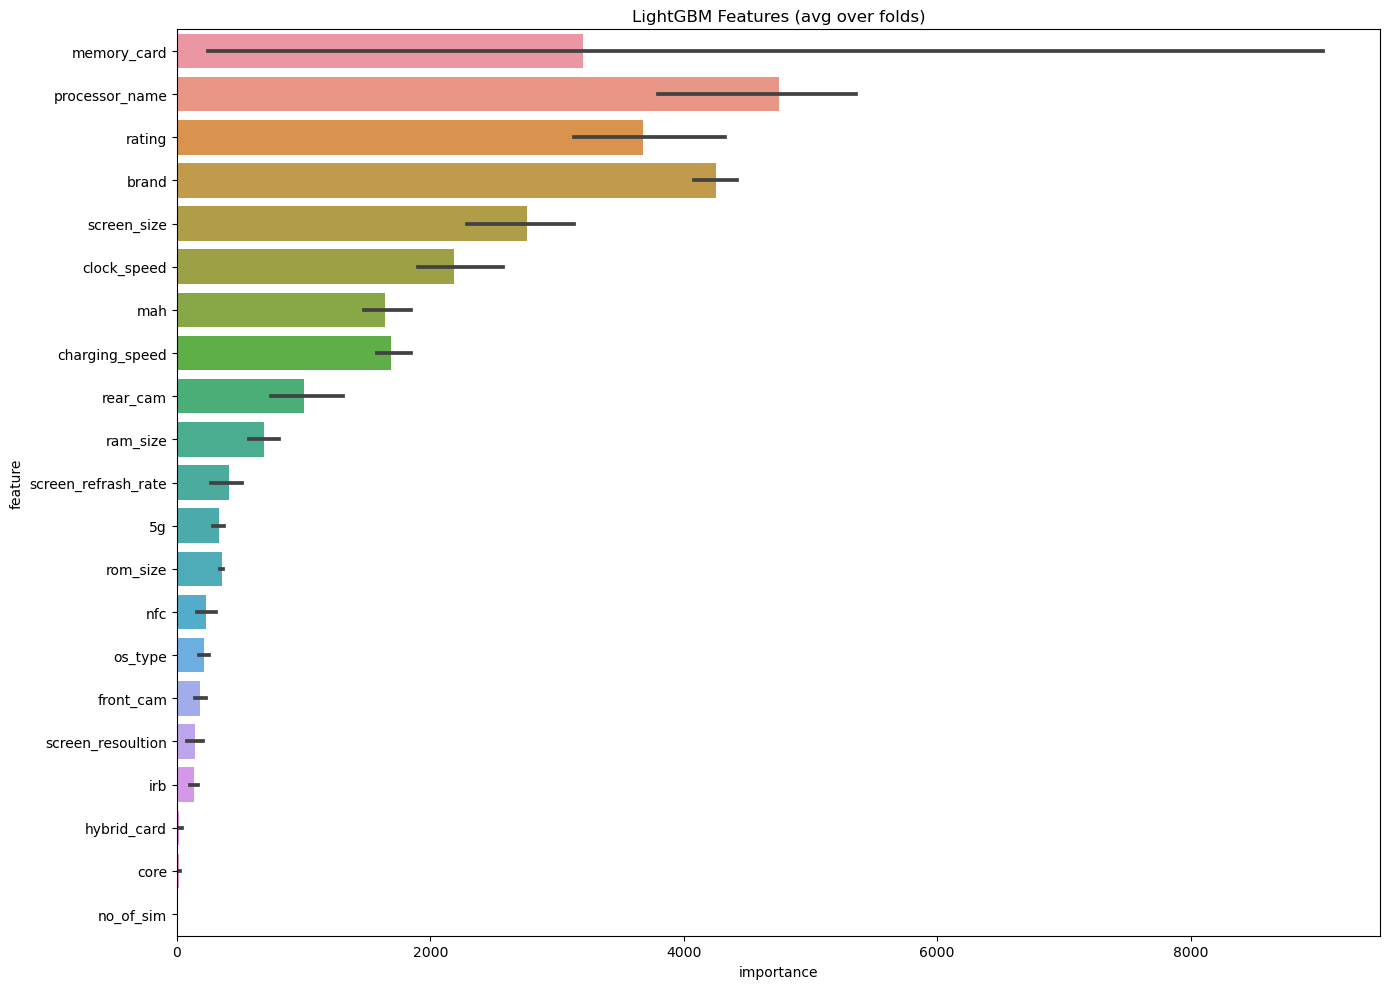

In [51]:
FOLDs = StratifiedKFold(n_splits=5, shuffle=True, random_state=7)

oof_lgb = np.zeros(len(X))
predictions_lgb = np.zeros(len(X))

features_lgb = list(X.columns)
feature_importance_df_lgb = pd.DataFrame()

for fold_, (trn_idx, val_idx) in enumerate(FOLDs.split(X, y_categorized)):
    trn_data = lgb.Dataset(X.iloc[trn_idx], label=y_log.iloc[trn_idx])
    val_data = lgb.Dataset(X.iloc[val_idx], label=y_log.iloc[val_idx])

    print("LGB " + str(fold_) + "-" * 50)
    num_round = 20000
    clf = lgb.train(lgb_params1, trn_data, num_round, valid_sets = [trn_data, val_data])
#     print(clf.predict(X.iloc[val_idx], num_iteration=clf.best_iteration).shape,oof_lgb.shape)
    oof_lgb[val_idx] = clf.predict(X.iloc[val_idx], num_iteration=clf.best_iteration)

    fold_importance_df_lgb = pd.DataFrame()
    fold_importance_df_lgb["feature"] = features_lgb
    fold_importance_df_lgb["importance"] = clf.feature_importance()
    fold_importance_df_lgb["fold"] = fold_ + 1
    feature_importance_df_lgb = pd.concat([feature_importance_df_lgb, fold_importance_df_lgb], axis=0)
    predictions_lgb += clf.predict(X, num_iteration=clf.best_iteration) / FOLDs.n_splits
    
#lgb.plot_importance(clf, max_num_features=30)    
cols = feature_importance_df_lgb[["feature", "importance"]].groupby("feature").mean().sort_values(by="importance", ascending=False)[:50].index
best_features_lgb = feature_importance_df_lgb.loc[feature_importance_df_lgb.feature.isin(cols)]
plt.figure(figsize=(14,10))
sns.barplot(x="importance", y="feature", data=best_features_lgb.sort_values(by="importance", ascending=False))
plt.title('LightGBM Features (avg over folds)')
plt.tight_layout()
# plt.savefig('lgbm_importances.png')
x = []
for i in oof_lgb:
    if i < 0:
        x.append(0.0)
    else:
        x.append(i)
cv_lgb = mean_squared_error(x, y_log)**0.5
cv_lgb = str(cv_lgb)
cv_lgb = cv_lgb[:10]

pd.DataFrame({'preds': x}).to_csv('lgb_oof_' + cv_lgb + '.csv', index = False)

print("CV_LGB : ", cv_lgb)

In [52]:
y

0      54999
1      19989
2      16499
3      14999
4      24999
       ...  
859    69990
860    34990
861    14990
862    28990
863    19990
Name: price_clean, Length: 864, dtype: int64

In [53]:
np.expm1(predictions_lgb)

array([ 65319.43544683,  19836.84864324,  15803.49372273,  17397.73902349,
        24445.68349636,  20139.83572612,  71404.99538025,  29611.4854996 ,
        28649.64102046,  29513.35927739,  18841.05807648,  20032.65511942,
        23350.2286122 ,  17453.82019732, 106245.50840085,  70995.21787469,
         9111.27933474,  49282.25658645,  35465.74694198,  11990.25268111,
        41180.8842324 ,  30987.87724035,  15117.24466529,  16546.01566299,
        46971.40975169,  37646.7456915 ,  21114.05186334,  25760.02796234,
        65469.8818045 ,  19629.94060921,  19579.45318452,  27135.56775261,
        49442.46276115,  25127.15964517,  44259.73454799,  25466.62177069,
       103765.57413398,  25564.11998471,  28976.33779773,  20816.06372867,
        20569.05614244,  21767.40546824,  27677.66955565,  17070.62772538,
        19949.08555264,  12281.03784782,   7648.48486455,  10004.93347822,
        36537.15829558,  19050.21058352,  30840.238286  ,  10992.80173077,
        19294.99264631,  

In [ ]:
# def get_dataset_partitions_pd(df, train_split=0.8, val_split=0.1, test_split=0.1, target_variable=None):
#     assert (train_split + test_split + val_split) == 1
    
#     # Only allows for equal validation and test splits
#     assert val_split == test_split 

#     # Shuffle
#     df_sample = df.sample(frac=1, random_state=12)

#     # Specify seed to always have the same split distribution between runs
#     # If target variable is provided, generate stratified sets
#     if target_variable is not None:
#         grouped_df = df_sample.groupby(target_variable)
#         arr_list = [np.split(g, [int(train_split * len(g)), int((1 - val_split) * len(g))]) for i, g in grouped_df]

#         train_ds = pd.concat([t[0] for t in arr_list])
#         val_ds = pd.concat([t[1] for t in arr_list])
#         test_ds = pd.concat([v[2] for v in arr_list])

#     else:
#         indices_or_sections = [int(train_split * len(df)), int((1 - val_split) * len(df))]
#         train_ds, val_ds, test_ds = np.split(df_sample, indices_or_sections)
    
#     return train_ds, val_ds, test_ds

In [ ]:
model=RandomForestRegressor()
model.fit(xTrain,yTrain)
pred=model.predict(xTest)
r2_score(yTest,pred)

In [ ]:
print(yTest.min(),yTest.max(),yTest.mean())
print(yTrain.min(),yTrain.max(),yTrain.mean())

In [ ]:
df_new['price_clean'].plot()

In [ ]:
yTest

In [ ]:
pred